#### Pair Problem - Week2 - Day5 - Regression Practice

Practice Lasso regularization technique in five steps:

1) Load Diabetes Dataset from SK Learn (`sklearn.datasets.load_diabetes()`).  Note that data may already be normalized.

2) Using sklearn model selection's `train_test_split`, hold out a portion of the data for final testing.

3) Use the KFold function from sklearn's cross validation module to divide the non-test data into 5 training/validation sets.  Randomize the KFold (via the shuffle parameter with Random State of 0).

4) Tune the lambda (alpha) parameter in the lasso model by looping over a grid of possible lambdas (sklearn: lasso)
and scoring each value on each validation fold.

```
For each candidate lambda, loop over the 5 training/validation sets.  
On each training/test set run the lasso model on the training set and then compute and record the prediction error in the validation set.  
Finally total the prediction error for the 5 training/validation sets.
```

5) Set lambda to be the value that minimizes prediction error across the validation folds.

6) Run the lasso model again on the entire train+validation data with the optimal lambda determined in step 3. 
Which variables would you consider excluding on the basis of these results?

7) Try with Ridge and ElasticNet and base LinearRegression Models.  Compare your results.

Once you've selected what you think is the best model, train it on train+validation, predict on your held out test data,
and report the final result.

**Extra Credit**:  Try some Feature Engineering (Polynomials etc) to fit the data better.  Plot the data to see relationships.


In [1]:
from __future__ import division, print_function  # Python 2 and 3 Compatibility

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [3]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)

### Load Data

In [4]:
diabetes = load_diabetes()

In [5]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

* data Matrix is X and target vector is y

In [6]:
diabetes.data.shape

(442, 10)

### Build a Hold Out Set to test different Models

In [7]:
X_train, X_holdout, y_train, y_holdout = train_test_split(diabetes.data, diabetes.target, test_size=0.1, random_state=42)

### Split Training Data into Multiple Folds

In [8]:
# Notice that we are splitting the X_train data into 5 Folds

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

### Baseline: Linear Regression

In [9]:
lin_reg_est = LinearRegression()

scores = cross_val_score(lin_reg_est, X_train, y_train, cv=kfold)
print(scores)
print("Linear Reg Mean Score: ", np.mean(scores))

# Build the Model
lin_reg_est.fit(X_train, y_train)

[0.38015962 0.41985738 0.55536535 0.48203479 0.52900323]
Linear Reg Mean Score:  0.47328407543781353


/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Evaluating Model

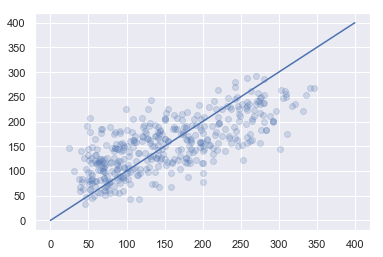

In [10]:
# Fitted vs. Actual
y_train_pred = lin_reg_est.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([0, 400], [0, 400])

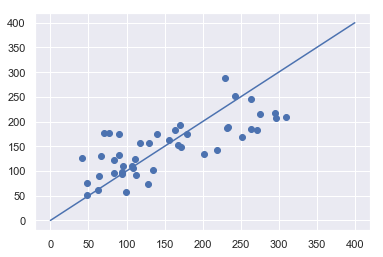

In [11]:
# Fitted vs. Actual
y_test_pred = lin_reg_est.predict(X_holdout)

plt.scatter(y_holdout, y_test_pred)
plt.plot([0, 400], [0, 400])

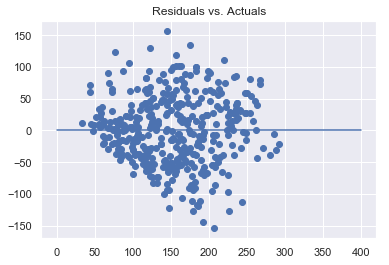

In [12]:
# Plot Residuals vs. predicted

lin_reg_residuals = y_train - y_train_pred

plt.scatter(y_train_pred, lin_reg_residuals)
plt.plot([0,400], [0, 0])
plt.title("Residuals vs. Actuals")

### Lasso

Lasso Model:


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.47293, std: 0.06545, params: {'alpha': 0.0001},
 mean: 0.47295, std: 0.06543, params: {'alpha': 0.0001604217161115324},
 mean: 0.47297, std: 0.06540, params: {'alpha': 0.000257351270001691},
 mean: 0.47301, std: 0.06535, params: {'alpha': 0.000412847323771536},
 mean: 0.47307, std: 0.06526, params: {'alpha': 0.0006622967617148325},
 mean: 0.47315, std: 0.06512, params: {'alpha': 0.001062467830894041},
 mean: 0.47325, std: 0.06490, params: {'alpha': 0.0017044291274531946},
 mean: 0.47336, std: 0.06455, params: {'alpha': 0.002734274456165233},
 mean: 0.47346, std: 0.06409, params: {'alpha': 0.004386370005779536},
 mean: 0.47327, std: 0.06341, params: {'alpha': 0.007036690038273056},
 mean: 0.47228, std: 0.06241, params: {'alpha': 0.011288378916846895},
 mean: 0.47213, std: 0.06036, params: {'alpha': 0.018109011179578204},
 mean: 0.47213, std: 0.05688, params: {'alpha': 0.029050786505108613},
 mean: 0.47203, std: 0.05188, params: {'alpha': 0.04660377025539271},
 mean: 0.47218, st

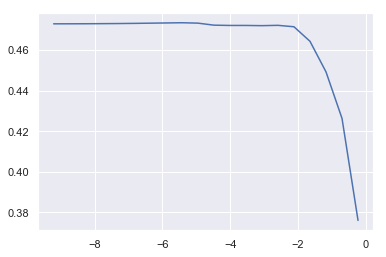

In [13]:
print("Lasso Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est = GridSearchCV(Lasso(), param_grid=params, cv=kfold)
grid_est.fit(X_train, y_train)
df = pd.DataFrame(grid_est.grid_scores_)
df["alpha"] = df.parameters.apply(lambda val: val["alpha"])
plt.plot(np.log(df.alpha), df.mean_validation_score);
grid_est.grid_scores_

In [14]:
grid_est.best_estimator_

Lasso(alpha=0.004386370005779536, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [15]:
params['alpha']

array([1.00000000e-04, 1.60421716e-04, 2.57351270e-04, 4.12847324e-04,
       6.62296762e-04, 1.06246783e-03, 1.70442913e-03, 2.73427446e-03,
       4.38637001e-03, 7.03669004e-03, 1.12883789e-02, 1.81090112e-02,
       2.90507865e-02, 4.66037703e-02, 7.47625680e-02, 1.19935395e-01,
       1.92402418e-01, 3.08655261e-01, 4.95150067e-01, 7.94328235e-01])

### Ridge

Ridge Model:


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.47296, std: 0.06544, params: {'alpha': 0.0001},
 mean: 0.47298, std: 0.06542, params: {'alpha': 0.0001604217161115324},
 mean: 0.47302, std: 0.06537, params: {'alpha': 0.000257351270001691},
 mean: 0.47307, std: 0.06531, params: {'alpha': 0.000412847323771536},
 mean: 0.47314, std: 0.06521, params: {'alpha': 0.0006622967617148325},
 mean: 0.47324, std: 0.06505, params: {'alpha': 0.001062467830894041},
 mean: 0.47334, std: 0.06483, params: {'alpha': 0.0017044291274531946},
 mean: 0.47342, std: 0.06453, params: {'alpha': 0.002734274456165233},
 mean: 0.47345, std: 0.06411, params: {'alpha': 0.004386370005779536},
 mean: 0.47343, std: 0.06354, params: {'alpha': 0.007036690038273056},
 mean: 0.47339, std: 0.06278, params: {'alpha': 0.011288378916846895},
 mean: 0.47343, std: 0.06172, params: {'alpha': 0.018109011179578204},
 mean: 0.47358, std: 0.06024, params: {'alpha': 0.029050786505108613},
 mean: 0.47379, std: 0.05815, params: {'alpha': 0.04660377025539271},
 mean: 0.47374, st

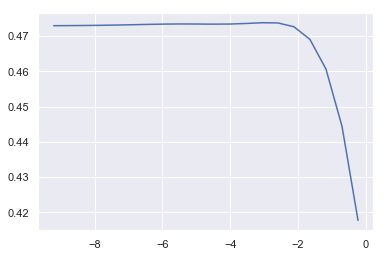

In [16]:
print("Ridge Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est = GridSearchCV(Ridge(), param_grid=params, cv=kfold)
grid_est.fit(X_train, y_train)
df = pd.DataFrame(grid_est.grid_scores_)
df["alpha"] = df.parameters.apply(lambda val: val["alpha"])
plt.plot(np.log(df.alpha), df.mean_validation_score);
grid_est.grid_scores_

### Make Functions for repeatable Code - DRY

In [17]:
def build_grid_search_est(model, X, y, cv=5, **params):
    
    grid_est = GridSearchCV(model, param_grid=params, cv=cv)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.grid_scores_)
    for param in params:
        df[param] = df.parameters.apply(lambda val: val[param])
#         plt.plot(np.log(df.alpha), df.mean_validation_score);
        plt.semilogx(df.alpha, df.mean_validation_score)
    grid_est.grid_scores_
    return grid_est

Lasso Grid Search


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


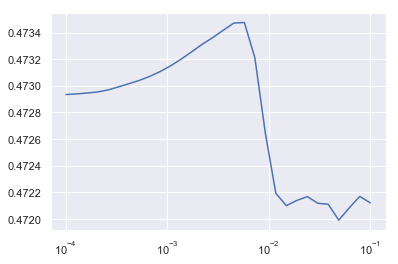

In [18]:
print("Lasso Grid Search")
lasso_grid_est = build_grid_search_est(Lasso(), X_train, y_train, cv=kfold,
                                       alpha=np.logspace(-4, -1, 30))

Ridge Grid Search


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


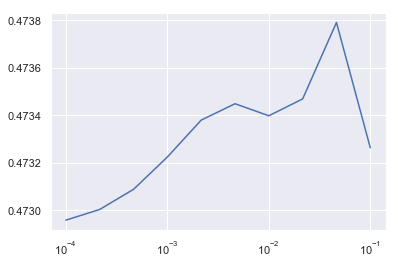

In [19]:
print("Ridge Grid Search")
ridge_grid_est = build_grid_search_est(Ridge(), X_train, y_train, cv=kfold,
                                       alpha=np.logspace(-4, -1, 10))

Elastic Net Grid Search


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


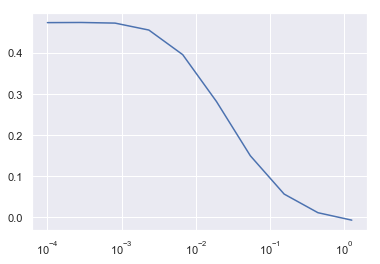

In [20]:
print("Elastic Net Grid Search")
elastic_net_grid_est = build_grid_search_est(ElasticNet(), X_train, y_train, cv=kfold,
                                             alpha=np.logspace(-4, 0.1, 10))

In [21]:
print("Lasso Grid Scores")
lasso_grid_est.grid_scores_

Lasso Grid Scores


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.47293, std: 0.06545, params: {'alpha': 0.0001},
 mean: 0.47294, std: 0.06545, params: {'alpha': 0.0001268961003167922},
 mean: 0.47295, std: 0.06543, params: {'alpha': 0.00016102620275609394},
 mean: 0.47295, std: 0.06542, params: {'alpha': 0.00020433597178569417},
 mean: 0.47297, std: 0.06540, params: {'alpha': 0.0002592943797404667},
 mean: 0.47299, std: 0.06538, params: {'alpha': 0.00032903445623126676},
 mean: 0.47302, std: 0.06534, params: {'alpha': 0.00041753189365604},
 mean: 0.47304, std: 0.06531, params: {'alpha': 0.0005298316906283707},
 mean: 0.47307, std: 0.06526, params: {'alpha': 0.0006723357536499335},
 mean: 0.47311, std: 0.06519, params: {'alpha': 0.0008531678524172806},
 mean: 0.47315, std: 0.06511, params: {'alpha': 0.001082636733874054},
 mean: 0.47320, std: 0.06501, params: {'alpha': 0.0013738237958832637},
 mean: 0.47326, std: 0.06489, params: {'alpha': 0.0017433288221999873},
 mean: 0.47331, std: 0.06472, params: {'alpha': 0.00221221629107045},
 mean: 0.

In [22]:
print("Ridge Grid Scores")
ridge_grid_est.grid_scores_

Ridge Grid Scores


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.47296, std: 0.06544, params: {'alpha': 0.0001},
 mean: 0.47300, std: 0.06539, params: {'alpha': 0.00021544346900318845},
 mean: 0.47309, std: 0.06529, params: {'alpha': 0.00046415888336127773},
 mean: 0.47322, std: 0.06508, params: {'alpha': 0.001},
 mean: 0.47338, std: 0.06469, params: {'alpha': 0.002154434690031882},
 mean: 0.47345, std: 0.06405, params: {'alpha': 0.004641588833612777},
 mean: 0.47340, std: 0.06300, params: {'alpha': 0.01},
 mean: 0.47347, std: 0.06124, params: {'alpha': 0.021544346900318822},
 mean: 0.47379, std: 0.05817, params: {'alpha': 0.046415888336127774},
 mean: 0.47326, std: 0.05304, params: {'alpha': 0.1}]

In [23]:
print("Elatic Net Grid Scores")
elastic_net_grid_est.grid_scores_

Elatic Net Grid Scores


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.47340, std: 0.06204, params: {'alpha': 0.0001},
 mean: 0.47377, std: 0.05826, params: {'alpha': 0.0002854667663497933},
 mean: 0.47225, std: 0.05063, params: {'alpha': 0.000814912746902074},
 mean: 0.45536, std: 0.03756, params: {'alpha': 0.0023263050671536237},
 mean: 0.39556, std: 0.02139, params: {'alpha': 0.006640827850634838},
 mean: 0.28144, std: 0.01135, params: {'alpha': 0.018957356524063752},
 mean: 0.14974, std: 0.01137, params: {'alpha': 0.05411695265464632},
 mean: 0.05658, std: 0.01255, params: {'alpha': 0.15448591479026733},
 mean: 0.01127, std: 0.01336, params: {'alpha': 0.4410059454176732},
 mean: -0.00682, std: 0.01374, params: {'alpha': 1.2589254117941673}]

### Evaluating Models using Holdout Set across these four models

In [24]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = lin_reg_est.predict(X_holdout)
print("Linear Regression:", r2_score(y_holdout, y_pred))

y_pred = lasso_grid_est.predict(X_holdout)
print("Lasso Regression:", r2_score(y_holdout, y_pred))

y_pred = ridge_grid_est.predict(X_holdout)
print("Ridge Regression:", r2_score(y_holdout, y_pred))

y_pred = elastic_net_grid_est.predict(X_holdout)
print("ElasticNet Regression:", r2_score(y_holdout, y_pred))

Linear Regression: 0.5514251914993503
Lasso Regression: 0.5538976451040123
Ridge Regression: 0.5519730779435752
ElasticNet Regression: 0.5515943777241817


In [25]:
pd.DataFrame(list(zip(range(10), lasso_grid_est.best_estimator_.coef_)))

,0,1
0,0,17.668205
1,1,-256.342212
2,2,512.816072
3,3,332.674929
4,4,-567.943028
5,5,259.323008
6,6,-0.000000
7,7,198.935809
8,8,613.988716
9,9,70.051069


### EDA

In [26]:
diabetes_df = pd.DataFrame(diabetes.data)
diabetes_df.columns = ["X" + str(col) for col in diabetes_df.columns]
diabetes_df["target"] = diabetes.target

In [27]:
diabetes_df.corr()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,target
X0,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
X1,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
X2,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
X3,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
X4,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
X5,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
X6,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
X7,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
X8,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
X9,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


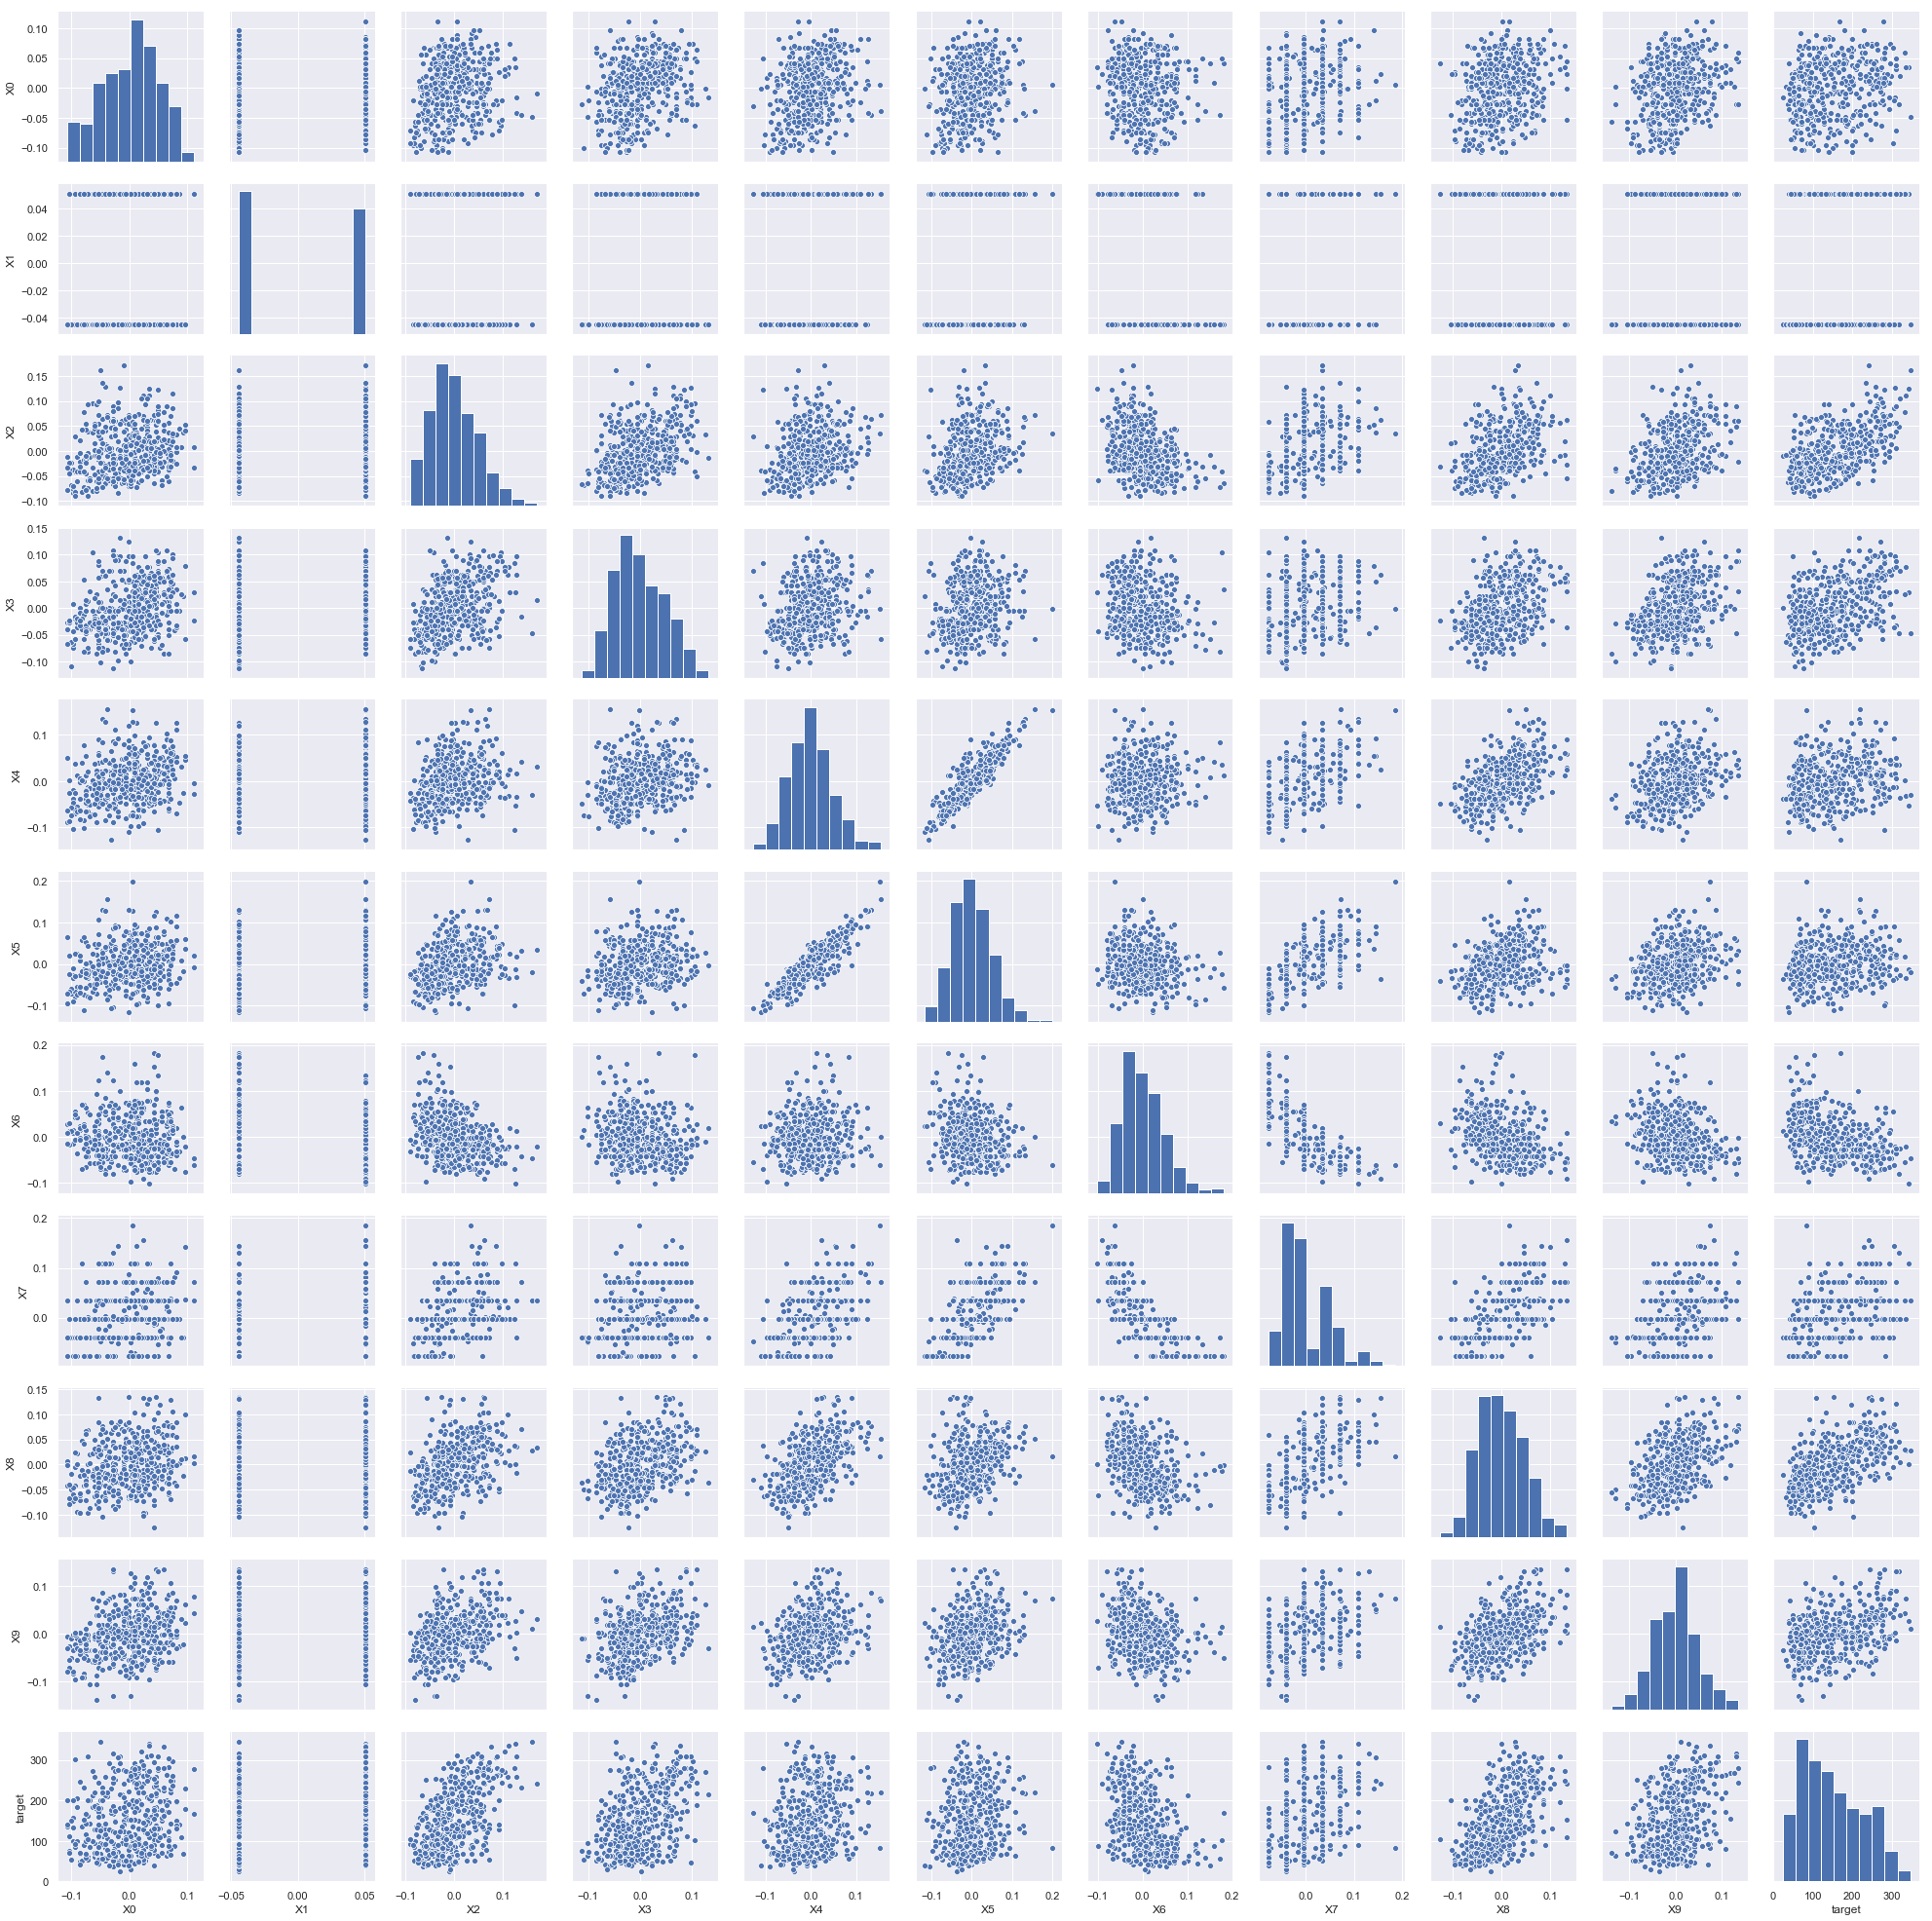

In [28]:
sns.pairplot(diabetes_df)

## Other Models

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()

lm_poly = LinearRegression()
lm_poly.fit(poly.fit_transform(X_train), y_train)
y_pred = lm_poly.predict(poly.transform(X_holdout))
print("Polynomial Regression:", r2_score(y_holdout, y_pred))

Polynomial Regression: 0.4677993429299758


Yikes!!

In [30]:
#getting fancy - we can do at least a little bit better
#(I should have cross-validated these to be rigorous)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=2000, max_features=3, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_holdout)
print("Random Forest Regression:", r2_score(y_holdout, y_pred))

gbm = GradientBoostingRegressor(n_estimators=500, max_depth=3, learning_rate=.01)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_holdout)
print("Gradient Boosted Regression:", r2_score(y_holdout, y_pred))

Random Forest Regression: 0.571812354009442
Gradient Boosted Regression: 0.6031122497763313


That's more like it.

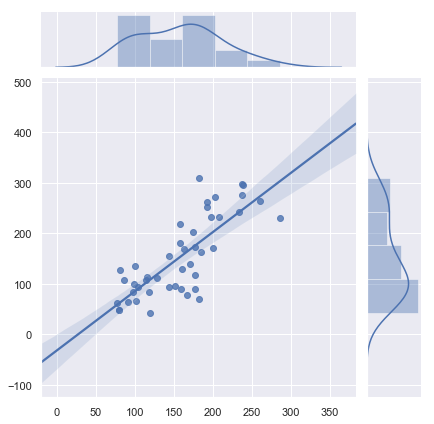

In [31]:
sns.jointplot(y_pred, y_holdout, kind='regplot')

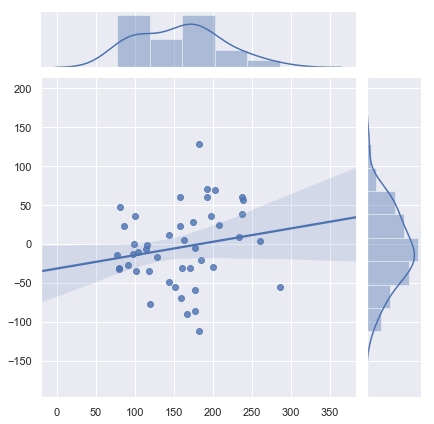

In [32]:
sns.jointplot(y_pred, y_holdout - y_pred, kind='regplot')